# Analisis Data Penyebaran Covid-19 di Indonesia

dataset diambil dari kaggle, clean dataset

### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import seaborn as sns

In [2]:
df = pd.read_csv("covid_19_data.csv")

### Explore Dataset

In [3]:
#melihat 5 data teratas dari dataset
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
#melihat informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236017 entries, 0 to 236016
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              236017 non-null  int64  
 1   ObservationDate  236017 non-null  object 
 2   Province/State   173972 non-null  object 
 3   Country/Region   236017 non-null  object 
 4   Last Update      236017 non-null  object 
 5   Confirmed        236017 non-null  float64
 6   Deaths           236017 non-null  float64
 7   Recovered        236017 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 14.4+ MB


In [5]:
#melihat statistik dekriptif dari dataset
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,236017.000000,2.360170e+05,236017.000000,2.360170e+05
mean,118009.000000,5.715800e+04,1487.719368,3.393027e+04
std,68132.383579,1.834751e+05,4770.414639,1.474800e+05
min,1.000000,-3.028440e+05,-178.000000,-8.544050e+05
25%,59005.000000,7.270000e+02,9.000000,1.000000e+01
50%,118009.000000,6.695000e+03,127.000000,1.224000e+03
75%,177013.000000,3.349900e+04,880.000000,1.263900e+04
max,236017.000000,3.664050e+06,108208.000000,6.399531e+06


In [6]:
#melihat negara yang ada
df["Country/Region"].unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia

In [7]:
#menghitung jumlah negara
negara = df["Country/Region"].unique()
count = 0

for i in negara:
    count = count +1

print ("Jumlah negara pada dataset: ", count)

Jumlah negara pada dataset:  227


In [8]:
#membuat dataset yang berisi negara indonesia saja
indo = df.loc[df['Country/Region'] == "Indonesia"]
indo = indo.drop(["Province/State", "SNo"], axis = 1)

In [9]:
indo

,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered
3034,03/02/2020,Indonesia,2020-03-02T18:03:04,2.0,0.0,0.0
3176,03/03/2020,Indonesia,2020-03-02T18:03:04,2.0,0.0,0.0
3337,03/04/2020,Indonesia,2020-03-02T18:03:04,2.0,0.0,0.0
3504,03/05/2020,Indonesia,2020-03-02T18:03:04,2.0,0.0,0.0
3672,03/06/2020,Indonesia,2020-03-06T12:33:03,4.0,0.0,0.0
...,...,...,...,...,...,...
232267,02/23/2021,Indonesia,2021-02-24 05:29:16,1298608.0,35014.0,1104990.0
233031,02/24/2021,Indonesia,2021-02-25 05:24:57,1306141.0,35254.0,1112725.0
233795,02/25/2021,Indonesia,2021-02-26 05:22:40,1314634.0,35518.0,1121411.0
234559,02/26/2021,Indonesia,2021-02-27 05:22:28,1322866.0,35786.0,1128672.0


### Mengecek korelasi antar kolom

<AxesSubplot:>

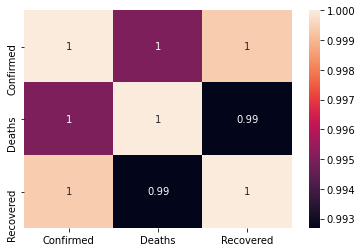

In [14]:
sns.heatmap(indo.corr(), annot = True)

Korelasi pada dataframe indo menunjukkan bahwa seluruh kolom berkorelasi positif kuat. Yang berarti semakin tinggi nilai suatu variable maka semakin tinggi juga nilai variable yang berkorelasi

### Visualisasi Data

#### Line Plot

Line plot Berguna untuk melihat perkembangan suatu data seperti data covid-19 di indonesia. Kita akan melihat perkembangan Covid-19

Text(0.5, 1.0, 'Kasus Covid-19 di Indonesia yang terkonfirmasi dan sembuh dari covid-19 setiap bulannya')

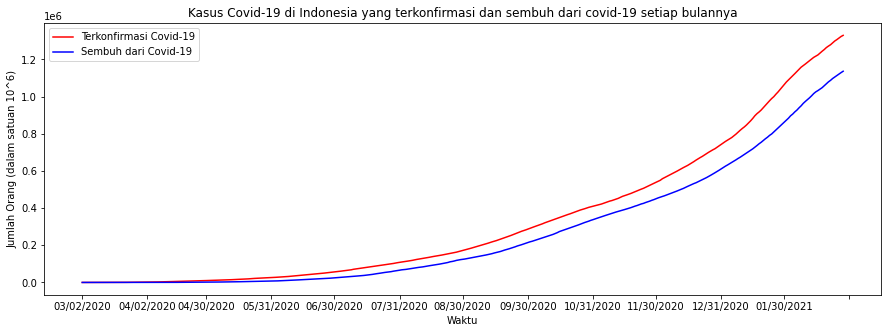

In [10]:
#membuat fungsi line plot
f,ax = plt.subplots(figsize=(15, 5)) #mengatur ukuran figure plot
plt.plot(indo["ObservationDate"],indo["Confirmed"], label = "Terkonfirmasi Covid-19", c = 'r') #membuat fungsi plot untuk yang terkonfirmasi
plt.plot(indo["ObservationDate"],indo["Recovered"], label = "Sembuh dari Covid-19", c = 'b') #membuat fungsi plot untuk sembuh

#mengubah sumbu x dari harian menjadi bulanan
locator = mdate.MonthLocator() 
plt.gca().xaxis.set_major_locator(locator)

plt.legend(loc='best') #memberikan legenda garis
plt.xlabel("Waktu") #memberi nama sumbu x
plt.ylabel("Jumlah Orang (dalam satuan 10^6)") #memberi nama sumbu y
plt.title("Kasus Covid-19 di Indonesia yang terkonfirmasi dan sembuh dari covid-19 setiap bulannya") #memberi judul

#### Pie Chart

Berguna untuk membandingkan proporsi dari data kategorikal. pada kasus ini digunakan untuk membandingkan presentase kematian, sembuh, dan terkonfirmasi pada tanggal dataset terakhir di-update

In [11]:
#Menampilkan 5 baris terakhir dari dataset
indo.tail()

,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered
232267,02/23/2021,Indonesia,2021-02-24 05:29:16,1298608.0,35014.0,1104990.0
233031,02/24/2021,Indonesia,2021-02-25 05:24:57,1306141.0,35254.0,1112725.0
233795,02/25/2021,Indonesia,2021-02-26 05:22:40,1314634.0,35518.0,1121411.0
234559,02/26/2021,Indonesia,2021-02-27 05:22:28,1322866.0,35786.0,1128672.0
235323,02/27/2021,Indonesia,2021-02-28 05:22:20,1329074.0,35981.0,1136054.0


In [12]:
#membuat dataset yang hanya berisi kolom terkonfirmasi, sembuh, dan kematian
df_indo = indo[["Confirmed","Deaths","Recovered"]]
df_indo.index = np.arange(1,len(indo)+1) #membuat index data mulai dari sampai banyak data dari dataset indo ditambah 1 (list mulai dari 0)
df_indo = df_indo.transpose() #transpose data, baris menjadi kolom
df_indo = df_indo.drop(df_indo.iloc[:, :-1], axis = 1) #menghapus semua kolom kecuali kolom terakhir
df_indo = df_indo.rename(columns = {363: "27-02-2021"}) #menamai kolom menjadi tanggal terakhir

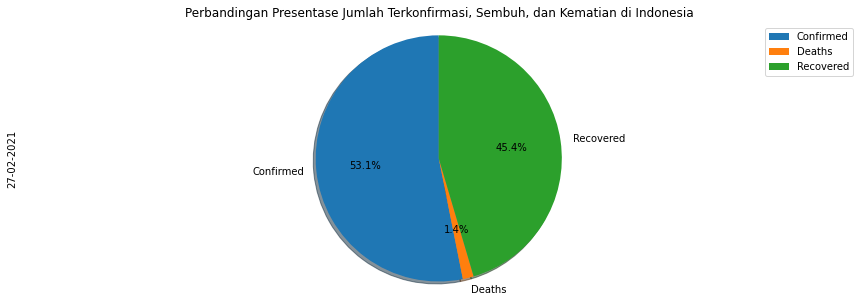

In [13]:
#membuat plot dalam bentuk pie chart
df_indo["27-02-2021"].plot(kind = 'pie', figsize = (15,5), autopct='%1.1f%%', startangle=90, shadow=True)

plt.title("Perbandingan Presentase Jumlah Terkonfirmasi, Sembuh, dan Kematian di Indonesia")
plt.axis('equal') #agar berbetuk lingkaran
plt.legend(loc='upper right') #mengatur posisi legenda
plt.show()